In [ ]:
from joblib import dump, load
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

def plot_hamiltonian_matplotlib(true_matrix, predicted_matrix, matrix_label=None, figure_title=None, predicted_matrix_text=None, filepath=None, force_max_colorbar_abs_error=None):
    """Matplotlib visualization of error matrices."""

    # Error matrices
    absolute_error_matrix = true_matrix - predicted_matrix
    threshold = 0.001
    mask = true_matrix >= threshold
    relative_error_matrix = np.where(mask, absolute_error_matrix / (true_matrix + threshold) * 100, 0)

    # Colorbar limits
    vmin = np.min([np.min(true_matrix), np.min(predicted_matrix)])
    vmax = np.max([np.max(true_matrix), np.max(predicted_matrix)])
    lim_data = max(np.abs(vmin), np.abs(vmax))

    if force_max_colorbar_abs_error is None:
        lim_abs = np.max(np.abs(absolute_error_matrix))
    else:
        lim_abs = force_max_colorbar_abs_error

    lim_rel = 100.0  # %

    cbar_limits = [lim_data, lim_data, lim_abs, lim_rel]

    # Titles
    if matrix_label is None:
        matrix_label = ''
    titles = [
        "True " + matrix_label,
        "Predicted " + matrix_label,
        "Absolute error (T-P)",
        f"Relative error (T-P)/(T) (masked where T is above {threshold})"
    ]
    cbar_titles = ["eV", "eV", "eV", "%"]

    # Matrices to plot
    matrices = [true_matrix, predicted_matrix, absolute_error_matrix, relative_error_matrix]

    fig, axes = plt.subplots(4, 1, figsize=(10, 16), constrained_layout=True, gridspec_kw={'hspace': 0.15})
    fig.suptitle(figure_title if figure_title else "Matrix Comparison and Errors", fontsize=16)

    for i, (matrix, ax) in enumerate(zip(matrices, axes)):
        im = ax.imshow(matrix, cmap='RdBu', vmin=-cbar_limits[i], vmax=cbar_limits[i])
        ax.set_title(titles[i])
        ax.set_ylabel("Row")
        cbar = fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.045, pad=0.02)
        cbar.set_label(cbar_titles[i])
        ax.set_xlabel("Col")
        ax.set_aspect('auto')

    # Text under predicted matrix (subplot 2)
    if predicted_matrix_text is not None:
        axes[1].text(1.0, -0.25, predicted_matrix_text, ha='right', va='center', fontsize=10, transform=axes[1].transAxes)

    # Absolute error stats (exclude zeros for stats)
    abs_err_nonzero = np.abs(absolute_error_matrix)[absolute_error_matrix != 0]
    if abs_err_nonzero.size > 0:
        mean_abs = np.mean(abs_err_nonzero)
        std_abs = np.std(abs_err_nonzero)
    else:
        mean_abs = std_abs = 0.0
    max_absolute_error = np.max(absolute_error_matrix)
    min_absolute_error = np.min(absolute_error_matrix)
    max_abs = np.max(np.abs([max_absolute_error, min_absolute_error]))

    fig.text(
        0.5, 0.245,
        f"mean_nnz(|T-P|) = {mean_abs:.3f} eV, std_nnz(|T-P|) = {std_abs:.3f} eV, |max| = {max_abs:.3f} eV",
        ha='center', va='center', fontsize=11,
    )

    # Relative error stats (exclude zeros for stats)
    rel_err_nonzero = np.abs(relative_error_matrix)[relative_error_matrix != 0]
    if rel_err_nonzero.size > 0:
        mean_rel = np.mean(rel_err_nonzero)
        std_rel = np.std(rel_err_nonzero)
    else:
        mean_rel = std_rel = 0.0
    max_relative_error = np.max(relative_error_matrix)
    min_relative_error = np.min(relative_error_matrix)
    max_abs_rel = np.max(np.abs([max_relative_error, min_relative_error]))

    fig.text(
        0.5, 0.001,
        f"mean_nnz(|T-P|) = {mean_rel:.3f} %, std_nnz(|T-P|) = {std_rel:.3f} %, |max| = {max_abs_rel:.3f} %",
        ha='center', va='center', fontsize=11,
    )
    axes[-1].set_xlabel(" ")

    # Output
    if filepath:
        plt.savefig(filepath, dpi=150, bbox_inches='tight')
        plt.close(fig)
    else:
        plt.show()
        plt.close(fig)

Loading data from ../scripts/debug_data.joblib
Results loaded!
Plotting hamiltonian...


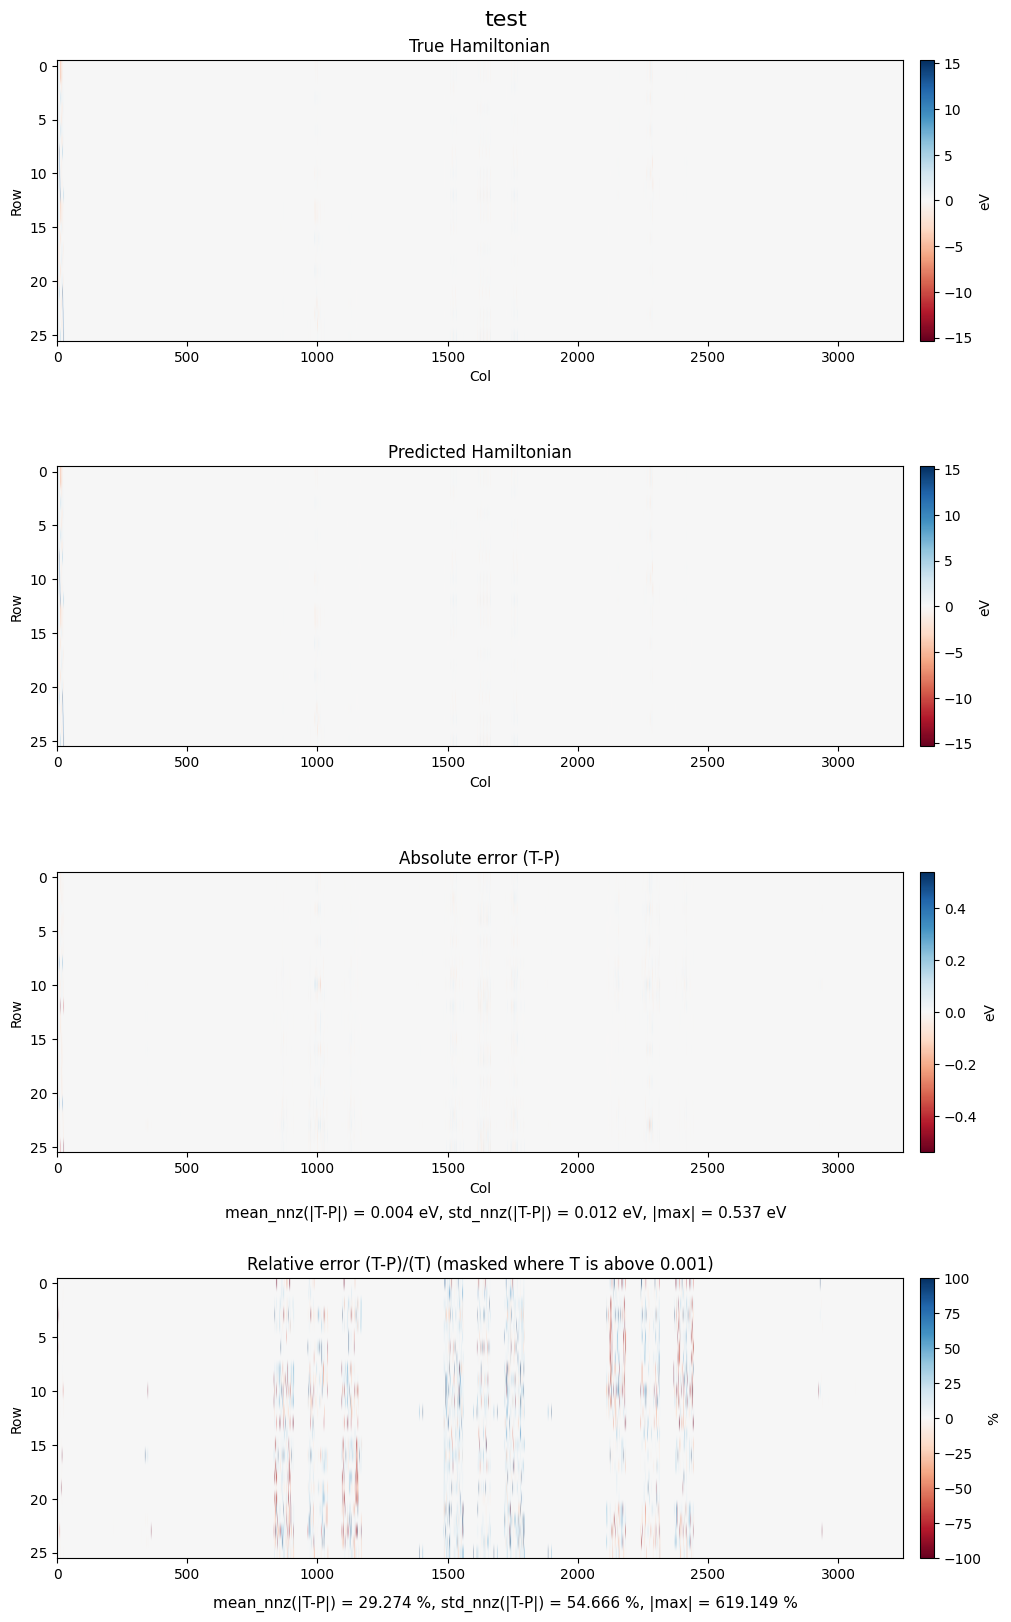

In [53]:
# 2. Plot hamiltonian
model_dir = Path("results/h_crystalls_1")
savedir = model_dir / "results" / "val_64atm"
calculations_path = Path('../scripts/debug_data.joblib')

data = load(calculations_path)

print(f"Loading data from {calculations_path}")
try:
    data = load(calculations_path)
    print("Results loaded!")
except FileNotFoundError:
    raise FileNotFoundError(f"Could not find the saved calculations at {calculations_path}")

# Reconstruct your tuples and labels
train_data   = (data['train_true'],   data['train_pred'])
val_data     = (data['val_true'],     data['val_pred'])
train_labels = data['train_labels']
val_labels   = data['val_labels']


# Unpack for clarity
train_true, train_pred = train_data
val_true,   val_pred   = val_data

n_train_samples = len(train_data[0])
n_val_samples = len(val_data[0])

print("Plotting hamiltonian...")
h_true = train_true[0]
h_pred = train_pred[0]
title = f"test"
# filepath = savedir / f"{n_atoms}atm_{structure}_hamiltonian.png"
plot_hamiltonian_matplotlib(
    h_true.todense(), h_pred.todense(),
    matrix_label="Hamiltonian",
    figure_title=title,
    predicted_matrix_text=None,
    filepath=None
)